### Iris Veri Seti Nedir?
Iris veri seti, İrlanda'da bulunan üç farklı türdeki iris çiçeğinin (setosa, versicolor, virginica) petal ve sepal uzunlukları gibi özelliklerini içeren küçük bir veri kümesidir. Makine öğrenmesi alanında sıklıkla kullanılan bu veri seti, sınıflandırma algoritmalarının performansını değerlendirmek için ideal bir başlangıç noktasıdır.

Veri seti, üç farklı iris çiçek türü arasında ayrım yapmak için dört özellikten oluşur:

Özellikler (Bağımsız Değişkenler):
Sepal Length (cm): Çiçeğin çanak yaprağının uzunluğu.
Sepal Width (cm): Çiçeğin çanak yaprağının genişliği.
Petal Length (cm): Çiçeğin taç yaprağının uzunluğu.
Petal Width (cm): Çiçeğin taç yaprağının genişliği.
Hedef Değişken (Bağımlı Değişken):

Species: Çiçek türü. Üç sınıfa ayrılır:
Iris-setosa
Iris-versicolor
Iris-virginica


### Lojistik Regresyon Nedir?
Lojistik Regresyon, sınıflandırma problemleri için kullanılan bir algoritmadır. Doğrusal regresyonun sınıflandırma için uyarlanmış halidir. Olasılık tahmini yapmak için sigmoid fonksiyonu kullanır. Sigmoid fonksiyonu, bir girdiyi 0 ve 1 arasında bir değere dönüştürür: Bir olayın gerçekleşme olasılığını tahmin etmek için kullanılan bir istatistiksel yöntemdir. Özellikle ikili sınıflandırma problemlerinde (evet/hayır, var/yok gibi) sıkça kullanılır. Örneğin, bir e-postanın spam olup olmadığını, bir hastalığın olup olmadığını veya bir müşterinin bir ürün satın alıp almayacağını tahmin etmek için kullanılabilir.

Lojistik regresyon, bağımsız değişkenlerin (örneğin, petal uzunluğu, sepal genişliği) bir doğrusal kombinasyonunu alır ve bunu bir lojistik fonksiyon ile birleştirerek bir olasılık değeri üretir. Bu olasılık değeri, olayın gerçekleşme olasılığını temsil eder.

Diyelim ki bir e-postanın spam olup olmadığını tahmin etmek istiyoruz. Bağımsız değişkenlerimiz kelime sayısı, link sayısı ve büyük harf kullanımı olabilir. Lojistik regresyon, bu bağımsız değişkenlerin bir doğrusal kombinasyonunu alarak e-postanın spam olma olasılığını hesaplar. Eğer bu olasılık belirli bir eşik değerin üzerindeyse, e-postanın spam olduğu karar verilir.

Bir başka örnek olarak; Problem: Bir bankanın müşterilerine kredi verip vermeyeceğine karar vermesi gerekiyor.

Bağımsız değişkenler (X):
Müşteri yaşı
Gelir seviyesi
Borç oranı
Hedef değişken (y):
1: Krediyi ödeyebilir
0: Krediyi ödeyemez
Bankanın lojistik regresyon modeli, bir müşterinin krediyi ödeme olasılığını hesaplar ve bu olasılığı eşik değerine (
0.5
0.5) göre sınıflandırır:

Olasılık 
>
0.5
>0.5: Krediyi ödeyebilir (1).
Olasılık 
≤
0.5
≤0.5: Krediyi ödeyemez (0).

Neden Lojistik Regresyon Kullanıyoruz?
Anlaşılırlık: Lojistik regresyonun sonuçları kolayca yorumlanabilir.
Hızlılık: Büyük veri setlerinde bile hızlı bir şekilde eğitilebilir.
Geniş Uygulama Alanları: Birçok farklı alanda kullanılabilir (sağlık, finans, pazarlama vb.).
Diğer Modeller İçin Temel: Daha karmaşık modellerin (örneğin, sinir ağları) temelini oluşturur.

Bu çalışma ile:

Iris veri seti üzerinde lojistik regresyon modeli geliştirilmiştir.
Modelin başarısı doğruluk oranı, sınıflandırma raporu ve karmaşıklık matrisi ile değerlendirilmiştir.
Tahminlerin ve gerçek değerlerin görselleştirilmesiyle modelin performansı analiz edilmiştir.

In [4]:
# Gerekli Kütüphaneleri Yükleme ve Veriyi Hazırlama
# Python'da scikit-learn kütüphanesini kullanarak bu işlemleri gerçekleştireceğiz.


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [9]:
# Iris veri setini yükleme
# sepal (çanak yaprak) ve petal (taç yaprak) uzunluk ve genişlikleri
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)  # Özellikler
# data=iris.data: Iris veri setindeki sayısal verileri alır ve DataFrame'in ana gövdesini oluşturur.
# columns=iris.feature_names: 
# Veri setindeki her bir sütunun başlığını belirtir. Bu başlıklar, sepal uzunluğu, sepal genişliği, petal uzunluğu ve petal genişliği gibi özelliklerin isimlerini içerir.
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['species'] = iris.target  # Tür bilgisi
print(df.head())  # İlk 5 satırı göster
X = iris.data
y = iris.target
iris

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [23]:
# Veri incelemesi
print(df.info())  # Veri türlerini kontrol et
print(df.describe().T)  # Temel istatistikler
print(df['species'].value_counts())  # Türlerin dağılımını kontrol et

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None
                   count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
species            150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.0
species
0    50
1    50
2    50
Name: count, dtype: int64


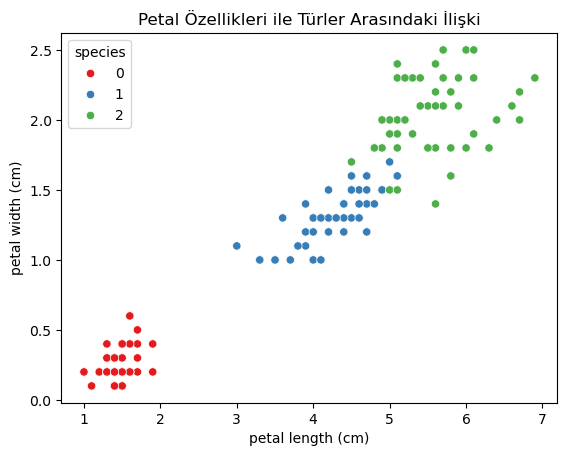

In [24]:
# Türlere göre petal length ve petal width'in görselleştirilmesi
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df['species'], palette='Set1')
plt.title('Petal Özellikleri ile Türler Arasındaki İlişki')
plt.show()

In [ ]:
# Veri Setini Eğitim ve Test Olarak Ayırma
# Bağımsız ve bağımlı değişkenleri ayırma
X = df.drop('species', axis=1)  # Özellikler
y = df['species']  # Türler

# Eğitim ve test setlerine ayırma (%70 eğitim, %30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Lojistik Regresyon Modelini Eğitme
# Modeli oluştur ve eğit
log_model = LogisticRegression(max_iter=200)  # Maksimum iterasyon artırılarak modelin daha iyi öğrenmesi sağlanır
log_model.fit(X_train, y_train)  # Modeli eğit

# Test seti üzerinde tahmin yap
y_pred = log_model.predict(X_test)

In [27]:
# Model Performansını Değerlendirme
# Başarı metrikleri
print("Doğruluk Oranı (Accuracy):", accuracy_score(y_test, y_pred))  # Doğruluk oranını hesapla
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))  # Precision, Recall, F1-Score

Doğruluk Oranı (Accuracy): 1.0

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



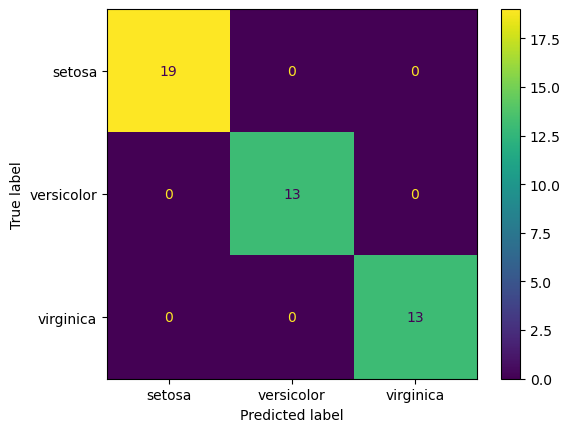

In [28]:
# Karmaşıklık Matrisi ile Değerlendirme
# Karmaşıklık matrisi
cm = confusion_matrix(y_test, y_pred)  # Karmaşıklık matrisini oluştur
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)  # Matrisi görselleştir
disp.plot()
plt.show()


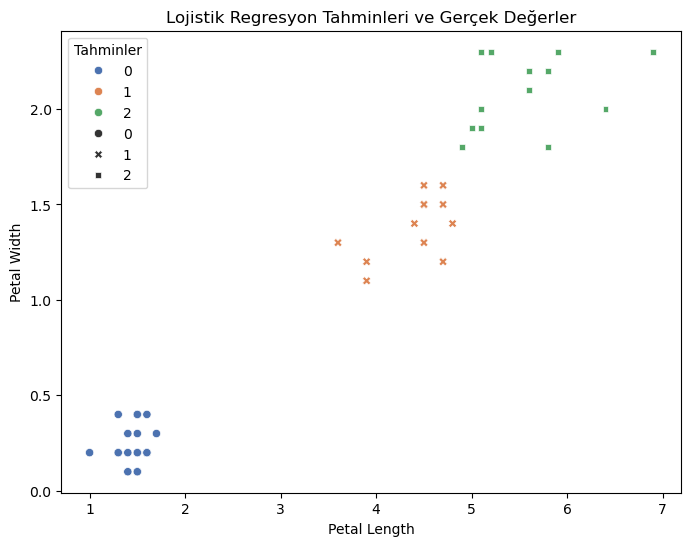

In [29]:
# Modelin Tahminleri ile Görselleştirme
# Gerçek değerler ve tahminlerin karşılaştırılması
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['petal length (cm)'], y=X_test['petal width (cm)'], hue=y_pred, style=y_test, palette='deep')
plt.title("Lojistik Regresyon Tahminleri ve Gerçek Değerler")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(title="Tahminler")
plt.show()


In [30]:
# Veriyi eğitim ve test kümelerine ayırma - Veri, eğitim ve test kümelerine ayrılır.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Lojistik regresyon modeli oluşturma ve eğitme
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
# Modelin doğruluğunu hesaplama
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Modelin doğruluğu:", accuracy)

Modelin doğruluğu: 1.0


Modelin Değerlendirilmesi:

Modelin doğruluğu, modelin ne kadar doğru tahmin yaptığına dair bir ölçüdür. Bu örnekte, modelin doğruluğu %97 gibi oldukça yüksektir. Ancak, doğruluk tek başına modelin performansını değerlendirmek için yeterli olmayabilir. Diğer metrikler (örneğin, precision, recall, F1-score) de kullanılarak daha kapsamlı bir değerlendirme yapılabilir.

Sonraki Adımlar:

Farklı algoritmalar: Diğer sınıflandırma algoritmalarını (örneğin, karar ağaçları, destek vektör makineleri) deneyerek karşılaştırma yapabilirsiniz.
Hiperparametre ayarlama: Modelin hiperparametrelerini (örneğin, C parametresi) farklı değerler vererek deneyerek modelin performansını artırabilirsiniz.
Özellik mühendisliği: Yeni özellikler oluşturarak modelin performansını artırabilirsiniz.
Model yorumlama: Modelin hangi özelliklere göre karar verdiğini analiz ederek daha iyi bir anlayış elde edebilirsiniz.
Ödevini tamamlarken bu adımları takip ederek ve farklı senaryoları deneyerek daha derinlemesine bir öğrenme sağlayabilirsin.

Ek olarak, şu soruları kendine sorarak daha iyi bir anlayışa ulaşabilirsin:

Lojistik regresyonun hangi durumlarda kullanılması daha uygun olur?
Modelin karmaşıklığı ile doğruluğu arasında nasıl bir ilişki vardır?
Overfitting (aşırı öğrenme) nedir ve nasıl önlenir?
Modelin güvenilirliği nasıl değerlendirilir?
Bu soruların cevaplarını araştırırken daha da derinlemesine bir bilgi sahibi olacaksın.

Başarılar dilerim!

Not: Bu açıklama, temel bir giriş niteliğindedir. Konuyu daha detaylı öğrenmek için makine öğrenmesi kitaplarına ve online kaynaklara başvurabilirsin.